---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [38]:
#EDA에 사용할 라이브러리를 import 하세요
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [203]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
df = pd.read_csv('sbikedata.csv')
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [164]:
df.shape

(5827, 11)

In [165]:
df.info

<bound method DataFrame.info of             date  hour  PM10  PM2.5  ozone  temperature  precipitation  \
0     2021-04-01     1  42.0   21.0  0.002         13.1              0   
1     2021-04-01     2  41.0   21.0  0.003         12.4              0   
2     2021-04-01     3  30.0   13.0  0.023         13.1              0   
3     2021-04-01     4  27.0   12.0  0.028         13.0              0   
4     2021-04-01     5  29.0   14.0  0.008         13.0              0   
...          ...   ...   ...    ...    ...          ...            ...   
5822  2021-11-29    20  74.0   58.0  0.002          9.3              0   
5823  2021-11-29    21  65.0   56.0  0.002          8.4              0   
5824  2021-11-29    22  51.0   41.0  0.002          8.6              0   
5825  2021-11-29    23  43.0   35.0  0.001          8.2              0   
5826  2021-11-30     0  39.0   31.0  0.004          7.9              0   

      windspeed  humidity  visibility  count  
0           1.4        49       

### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) :
ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 :
ㅇ 귀무가설: 시간과 따릉이간에는 연관성이 없다.
    
ㅇ 대립가설 : 시간과 따릉이 대여량 간에는 연관성이 있다.


- 가설 3 :
ㅇ 귀무가설: 온도와 따릉이간에는 연관성이 없다.
    
ㅇ 대립가설 : 온도와 따릉이 대여량 간에는 연관성이 있다.


- 가설 4 :
ㅇ 귀무가설: 미세먼지와 따릉이간에는 연관성이 없다.
    
ㅇ 대립가설 : 미세먼지와 따릉이 대여량 간에는 연관성이 있다.


- 가설 5 :
ㅇ 귀무가설: 풍속과 따릉이간에는 연관성이 없다.
    
ㅇ 대립가설 : 풍속과 따릉이 대여량 간에는 연관성이 있다.


- 가설 6 :
ㅇ 귀무가설: 날짜와 따릉이간에는 연관성이 없다.
    
ㅇ 대립가설 : 날짜와 따릉이 대여량 간에는 연관성이 있다.


### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요? 시간

2. 변수가 수치형인지 범주형인지


In [197]:
#변수의 자료형을 확인해보세요.
df['hour'].dtype

dtype('int64')

In [204]:
df['month'] = df['date'].str.slice(start=5, stop=7)
df['month']
df['month'] = df['month'].astype('int')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [199]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
df.loc[df['hour'] == 'NaN']

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month


In [200]:
df = df.dropna()
print(df.shape)

(5670, 12)


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 0 to 5826
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5670 non-null   object 
 1   hour           5670 non-null   int64  
 2   PM10           5670 non-null   float64
 3   PM2.5          5670 non-null   float64
 4   ozone          5670 non-null   float64
 5   temperature    5670 non-null   float64
 6   precipitation  5670 non-null   int64  
 7   windspeed      5670 non-null   float64
 8   humidity       5670 non-null   int64  
 9   visibility     5670 non-null   int64  
 10  count          5670 non-null   int64  
 11  month          5670 non-null   int32  
dtypes: float64(5), int32(1), int64(5), object(1)
memory usage: 553.7+ KB


4. 변수의 기초 통계량 확인

In [186]:
#변수의 기초 통계량을 확인해보세요.
df.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.00000,5670.000000,5670.000000,5670.000000
mean,11.495238,31.580423,15.332451,0.031793,19.418959,0.075309,2.231217,68.61552,1763.198765,215.869841,7.442504
std,6.953965,42.811991,12.860270,0.018250,7.455268,0.263912,1.046569,17.28755,484.862120,186.974342,2.265292
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.00000,60.000000,1.000000,4.000000
25%,5.000000,16.000000,7.000000,0.019000,14.200000,0.000000,1.500000,56.00000,1943.000000,53.000000,5.000000
50%,11.000000,24.500000,13.000000,0.031000,20.500000,0.000000,2.150000,70.00000,2000.000000,186.000000,7.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.00000,2000.000000,317.000000,9.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.00000,2000.000000,1746.000000,11.000000


5. 변수의 분포 확인

In [35]:
#변수의 분포를 확인해보세요.
df.corr()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
hour,1.000000,0.045693,0.056238,0.224323,0.188384,0.000916,0.223520,-0.304854,0.090437,0.587559
PM10,0.045693,1.000000,0.692439,0.008235,-0.118791,-0.093438,0.050168,-0.091791,-0.274157,0.032628
PM2.5,0.056238,0.692439,1.000000,0.053284,-0.089720,-0.137832,-0.131809,-0.046645,-0.405487,0.052924
ozone,0.224323,0.008235,0.053284,1.000000,0.531382,-0.075875,0.350649,-0.403433,0.136367,0.314336
temperature,0.188384,-0.118791,-0.089720,0.531382,1.000000,-0.040147,0.062704,-0.086916,0.131999,0.274162
precipitation,0.000916,-0.093438,-0.137832,-0.075875,-0.040147,1.000000,0.050690,0.383162,-0.497019,-0.268666
windspeed,0.223520,0.050168,-0.131809,0.350649,0.062704,0.050690,1.000000,-0.291527,0.077832,0.229222
humidity,-0.304854,-0.091791,-0.046645,-0.403433,-0.086916,0.383162,-0.291527,1.000000,-0.490143,-0.480742
visibility,0.090437,-0.274157,-0.405487,0.136367,0.131999,-0.497019,0.077832,-0.490143,1.000000,0.262073
count,0.587559,0.032628,0.052924,0.314336,0.274162,-0.268666,0.229222,-0.480742,0.262073,1.000000


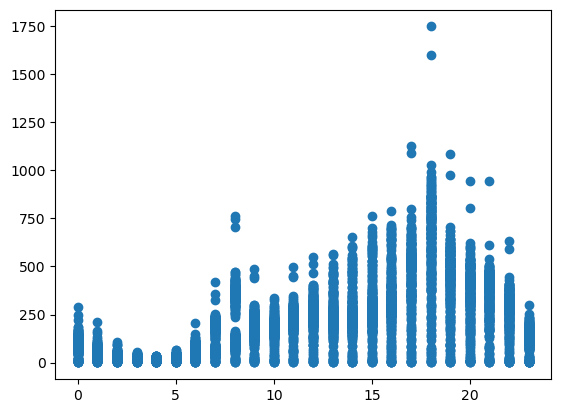

In [62]:
plt.scatter('hour', 'count', data = df)
plt.show()

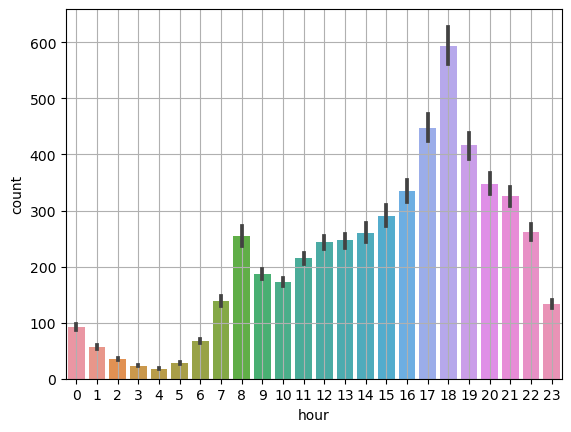

In [76]:
sns.barplot(x="hour", y="count", data=df)
plt.grid()
plt.show()

In [39]:
spst.pearsonr(df['hour'], df['count'])

PearsonRResult(statistic=0.587558535914158, pvalue=0.0)

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.
시간에 따른 대여량은 관련이 있다.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도

2. 변수가 수치형인지 범주형인지


In [42]:
#변수의 자료형을 확인해보세요.
df['temperature'].dtype

dtype('float64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [50]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
df_tp = df.loc[df['hour'] >= 1000]

In [52]:
# df.drop(df_tp, axis=0, inplace=True)

4. 변수의 기초 통계량 확인

In [43]:
#변수의 기초 통계량을 확인해보세요
df['temperature'].describe

<bound method NDFrame.describe of 0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5670, dtype: float64>

5. 변수의 분포 확인

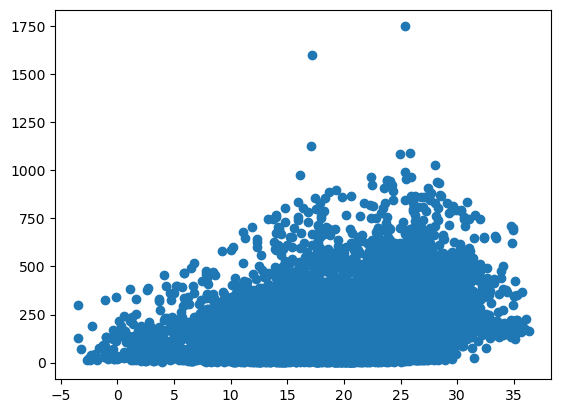

In [77]:
#변수의 분포를 확인해보세요.
plt.scatter('temperature', 'count', data = df)
plt.show()

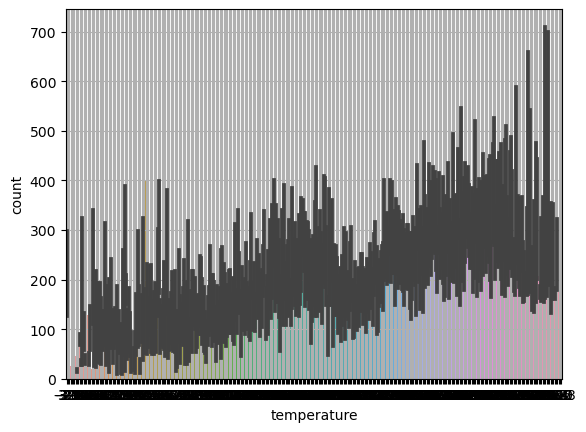

In [78]:
sns.barplot(x="temperature", y="count", data=df)
plt.grid()
plt.show()

In [54]:
spst.pearsonr(df['temperature'], df['count'])

PearsonRResult(statistic=0.27416222788541533, pvalue=2.585011313554534e-98)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

온도와 대여량은 관련이 없다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우여부

2. 변수가 수치형인지 범주형인지


In [56]:
#변수의 자료형을 확인해보세요.
df['precipitation'].dtype

dtype('int64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [57]:
#변수의 기초 통계량을 확인해보세요

In [252]:
df['precipitation'].describe

<bound method NDFrame.describe of 0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64>

In [253]:
df['precipitation'].info

<bound method Series.info of 0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64>

5. 변수의 분포 확인

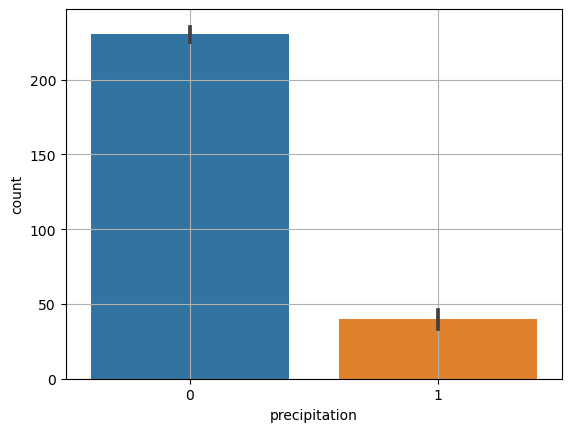

In [64]:
#변수의 분포를 확인해보세요.
sns.barplot(x="precipitation", y="count", data=df)
plt.grid()
plt.show()

In [65]:
spst.pearsonr(df['precipitation'], df['count'])

PearsonRResult(statistic=-0.268666019314997, pvalue=2.428442706509742e-94)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속

2. 변수가 수치형인지 범주형인지


In [63]:
#변수의 자료형을 확인해보세요.
df['windspeed'].dtype

dtype('float64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.


4. 변수의 기초 통계량 확인

In [69]:
#변수의 기초 통계량을 확인해보세요
df['windspeed'].describe

<bound method NDFrame.describe of 0       1.4
1       2.1
2       3.4
3       3.1
4       2.9
       ... 
5822    0.3
5823    2.0
5824    1.9
5825    2.1
5826    2.3
Name: windspeed, Length: 5670, dtype: float64>

5. 변수의 분포 확인

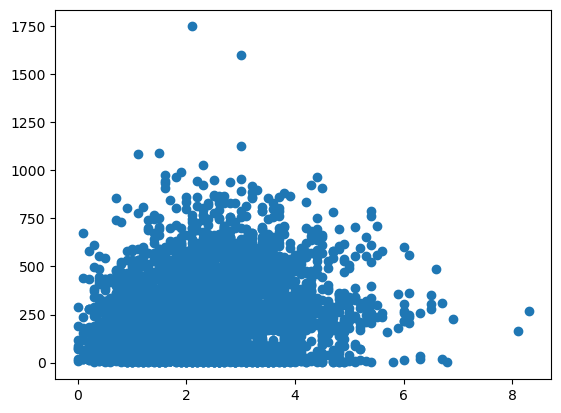

In [79]:
#변수의 분포를 확인해보세요.
plt.scatter('windspeed', 'count', data = df)
plt.show()

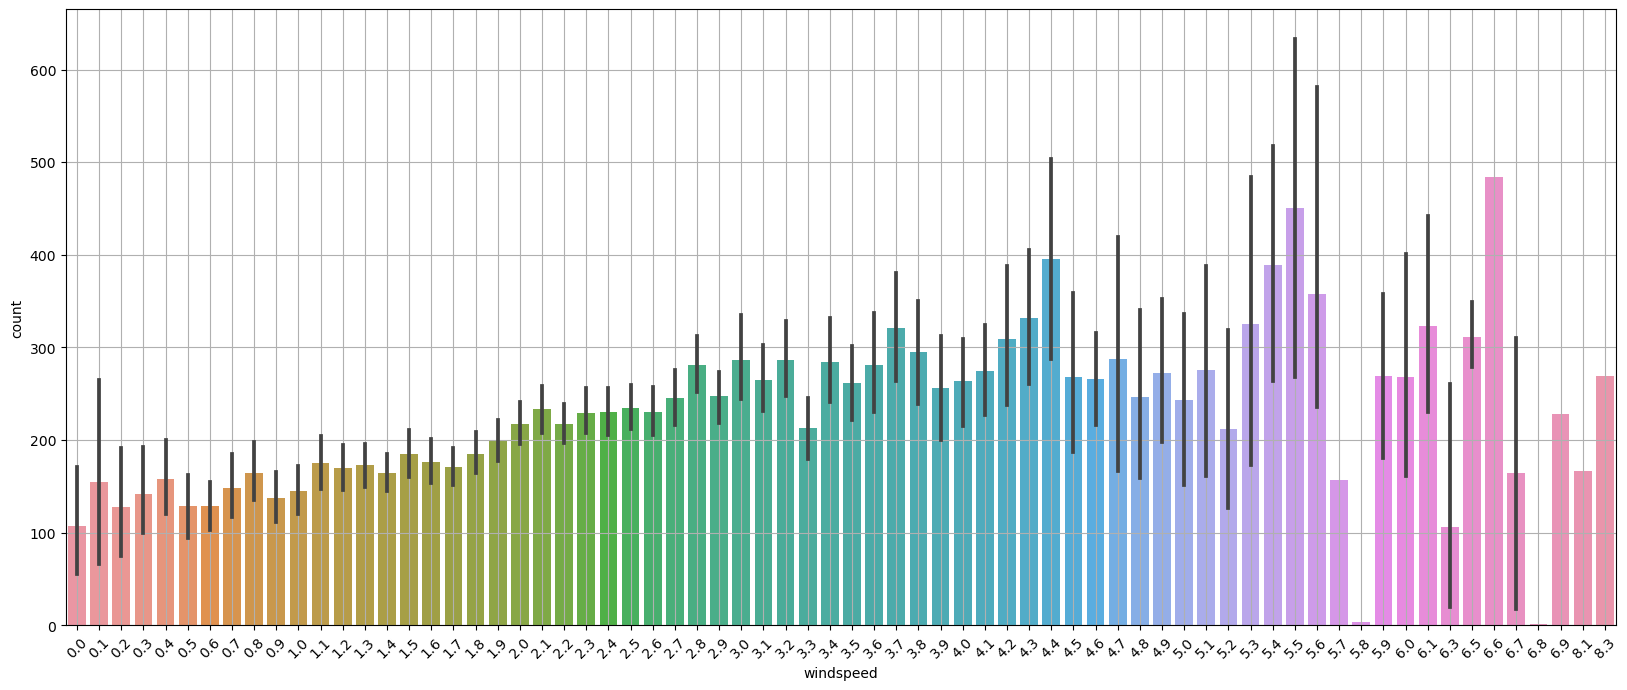

In [86]:
plt.figure(figsize=(20,8))
sns.barplot(x="windspeed", y="count", data=df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [67]:
spst.pearsonr(df['windspeed'], df['count'])

PearsonRResult(statistic=0.22922151636418522, pvalue=1.7134562728138145e-68)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


In [71]:
#변수의 자료형을 확인해보세요.
df['humidity'].dtype

dtype('int64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.


4. 변수의 기초 통계량 확인

In [72]:
#변수의 기초 통계량을 확인해보세요
df['humidity'].describe

<bound method NDFrame.describe of 0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5670, dtype: int64>

5. 변수의 분포 확인

In [74]:
#변수의 분포를 확인해보세요.

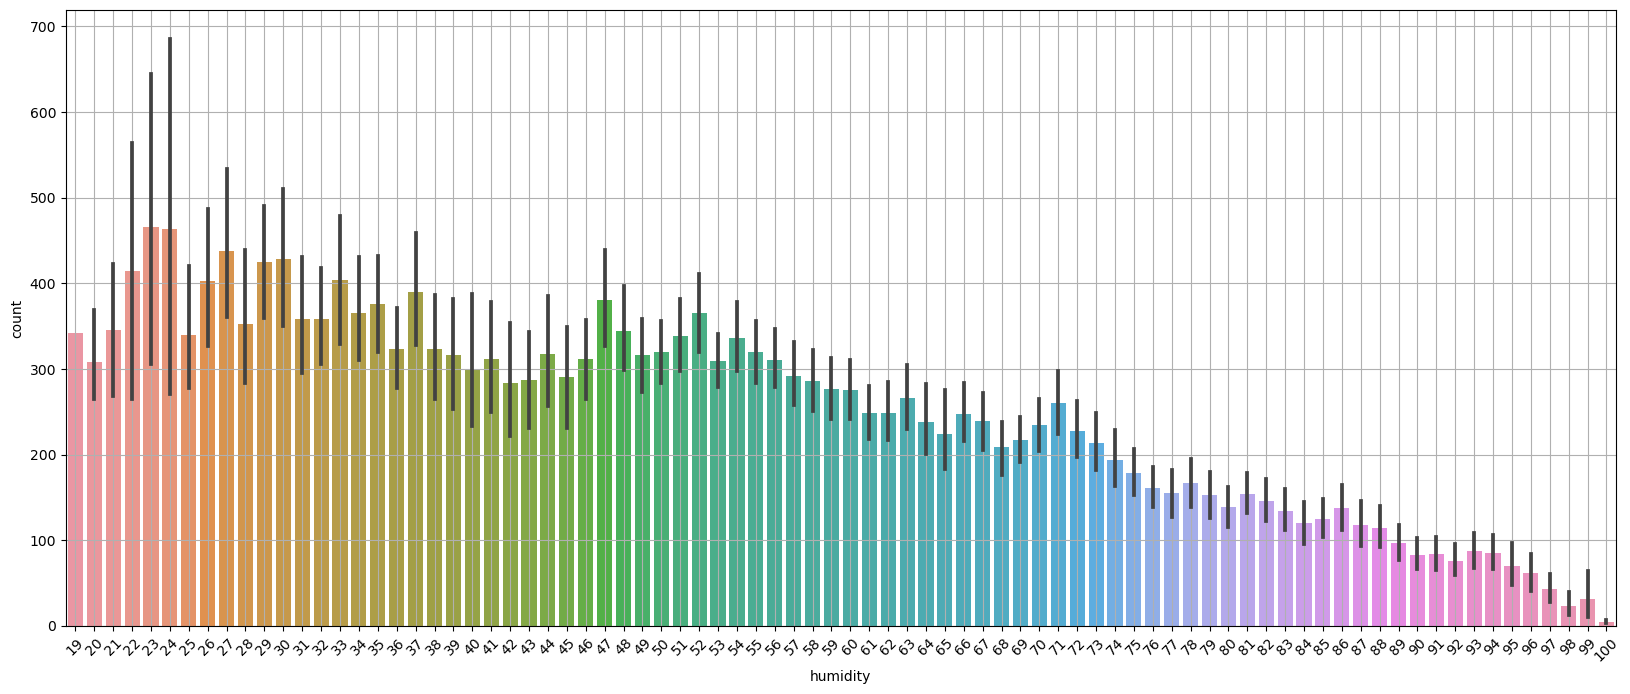

In [87]:
plt.figure(figsize=(20,8))
sns.barplot(x="humidity", y="count", data=df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [246]:
spst.pearsonr(df['humidity'], df['count'])

PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)

date      2021-04-01  2021-04-02  2021-04-03  2021-04-04  2021-04-05  \
humidity                                                               
19               1.0         NaN         NaN         NaN         NaN   
20               3.0         NaN         NaN         NaN         NaN   
21               1.0         NaN         NaN         NaN         1.0   
22               1.0         NaN         NaN         NaN         NaN   
23               NaN         NaN         NaN         NaN         2.0   
...              ...         ...         ...         ...         ...   
96               NaN         NaN         2.0         1.0         NaN   
97               NaN         NaN         1.0         NaN         NaN   
98               NaN         NaN         3.0         NaN         NaN   
99               NaN         NaN         NaN         NaN         NaN   
100              NaN         NaN         NaN         NaN         NaN   

date      2021-04-06  2021-04-07  2021-04-08  2021-04-09  2021-

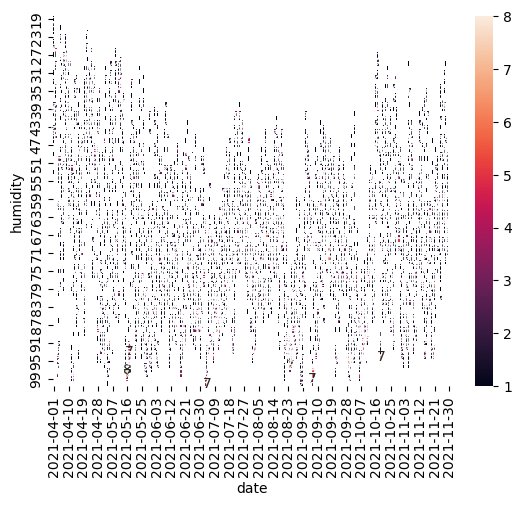

In [248]:
temp1 = df.groupby(['humidity','date'], as_index = False)['count'].count()
temp2 = temp1.pivot('humidity','date','count')
print(temp2)

sns.heatmap(temp2, annot=True)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시정: 기상학에서 시정(視程)은 물체나 빛이 분명하게 보이는 최대 거리

2. 변수가 수치형인지 범주형인지


In [88]:
#변수의 자료형을 확인해보세요.
df['visibility'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

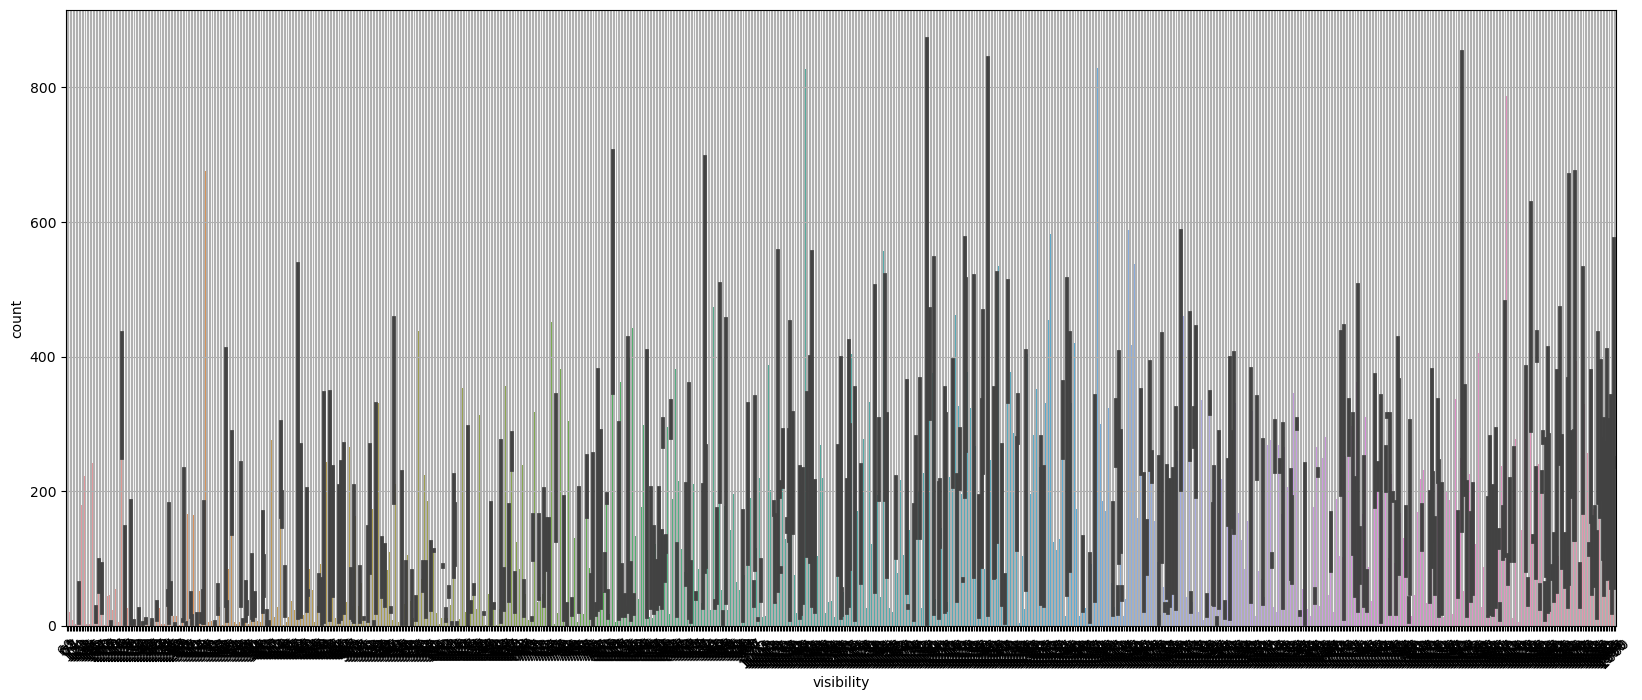

In [90]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(20,8))
sns.barplot(x="visibility", y="count", data=df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [92]:
spst.pearsonr(df['visibility'], df['count'])

PearsonRResult(statistic=0.26207314766928064, pvalue=1.0691328205534822e-89)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존수치

2. 변수가 수치형인지 범주형인지


In [93]:
#변수의 자료형을 확인해보세요.
df['ozone'].dtype

dtype('float64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

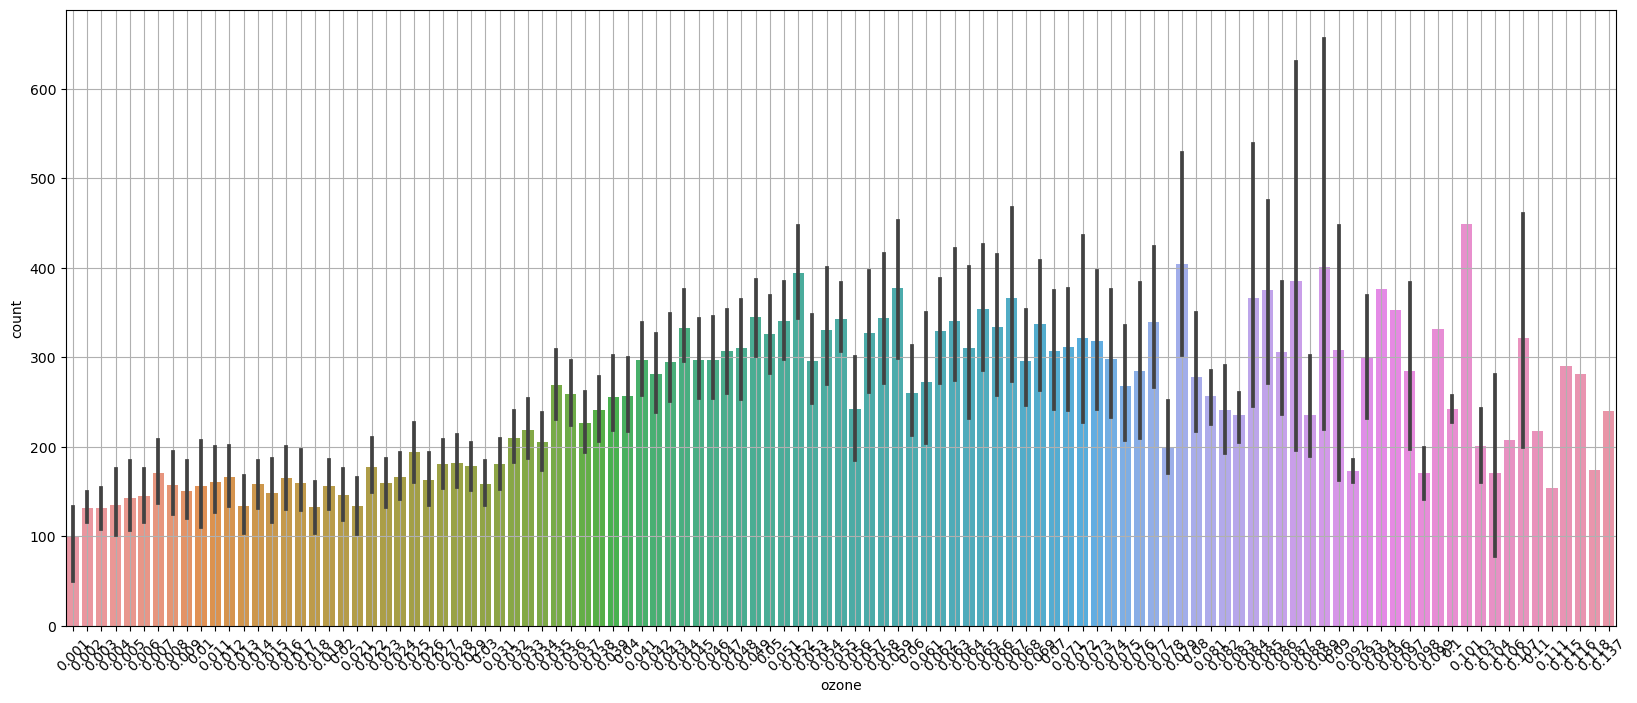

In [94]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(20,8))
sns.barplot(x="ozone", y="count", data=df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [96]:
spst.pearsonr(df['ozone'], df['count'])

PearsonRResult(statistic=0.3143357943088431, pvalue=3.025523189274068e-130)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지농도

2. 변수가 수치형인지 범주형인지


In [97]:
#변수의 자료형을 확인해보세요.
df['PM10'].dtype

dtype('float64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

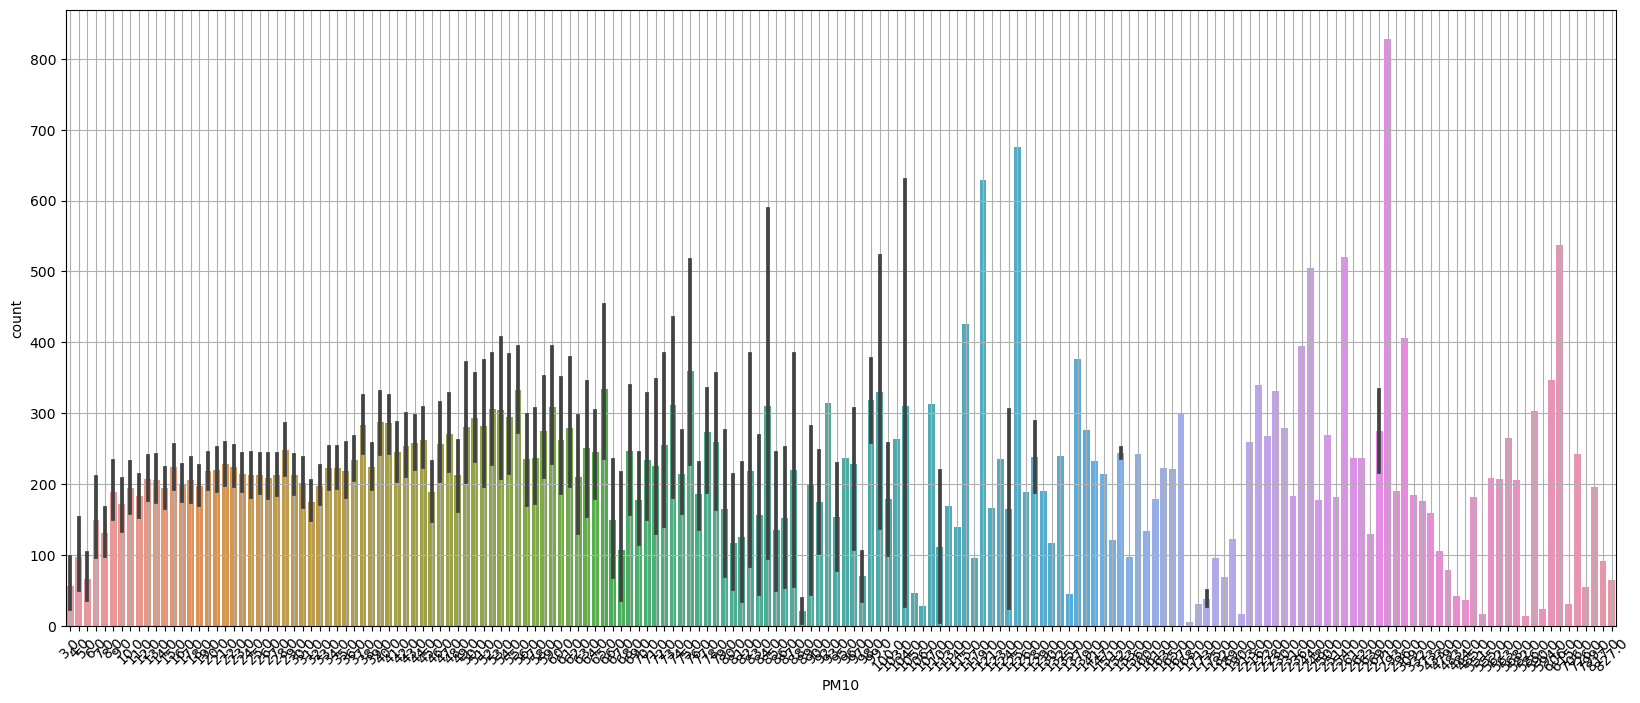

In [99]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(20,8))
sns.barplot(x="PM10", y="count", data=df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [100]:
spst.pearsonr(df['PM10'], df['count'])

PearsonRResult(statistic=0.03262773163856617, pvalue=0.01401178505403581)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [101]:
#변수의 자료형을 확인해보세요.
df['PM2.5'].dtype

dtype('float64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

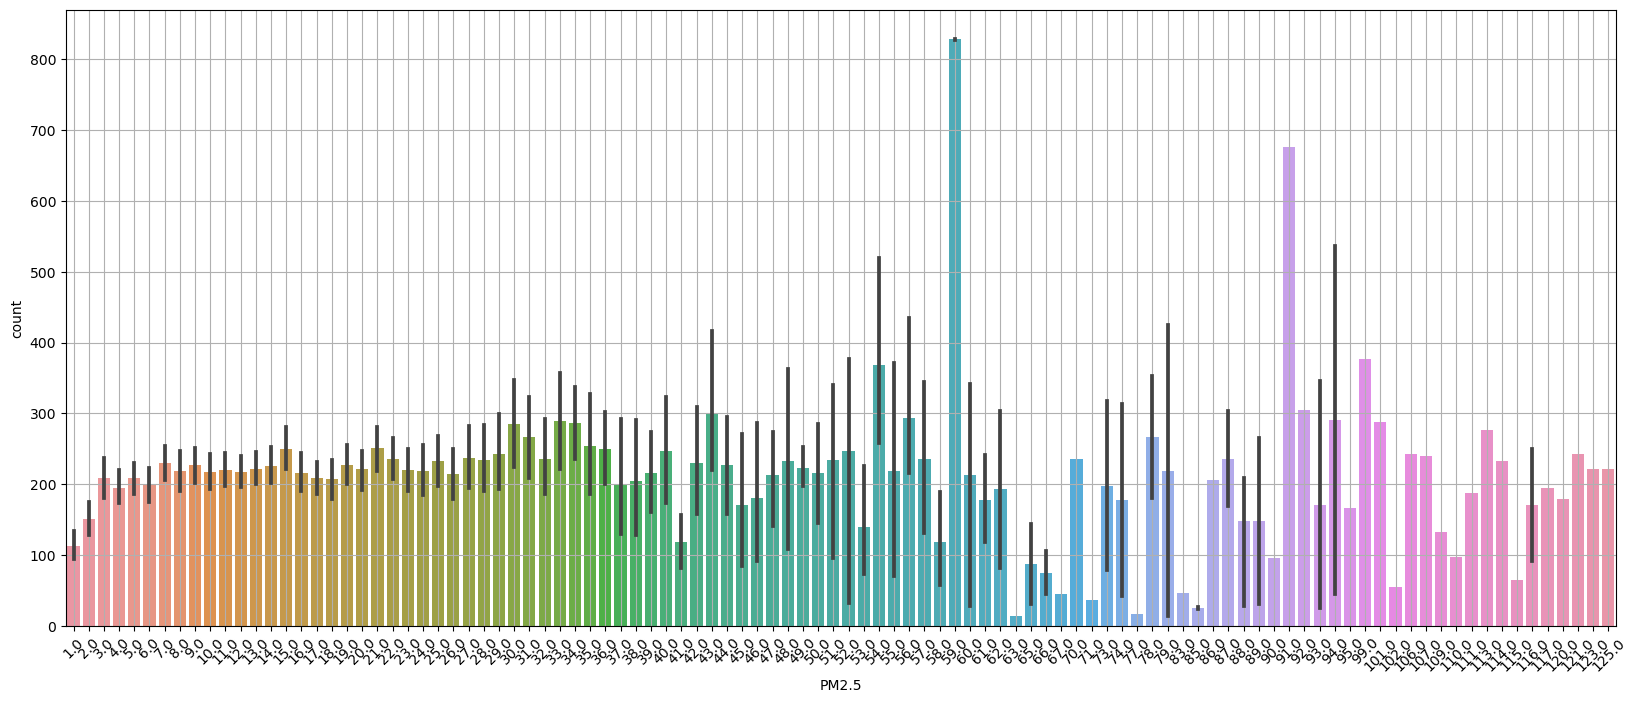

In [103]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(20,8))
sns.barplot(x="PM2.5", y="count", data=df)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [104]:
spst.pearsonr(df['PM2.5'], df['count'])

PearsonRResult(statistic=0.0529237283818275, pvalue=6.690256718116022e-05)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

대여량

2. 변수가 수치형인지 범주형인지


In [105]:
#변수의 자료형을 확인해보세요.
df['count'].dtype

dtype('int64')

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요


5. 변수의 분포 확인

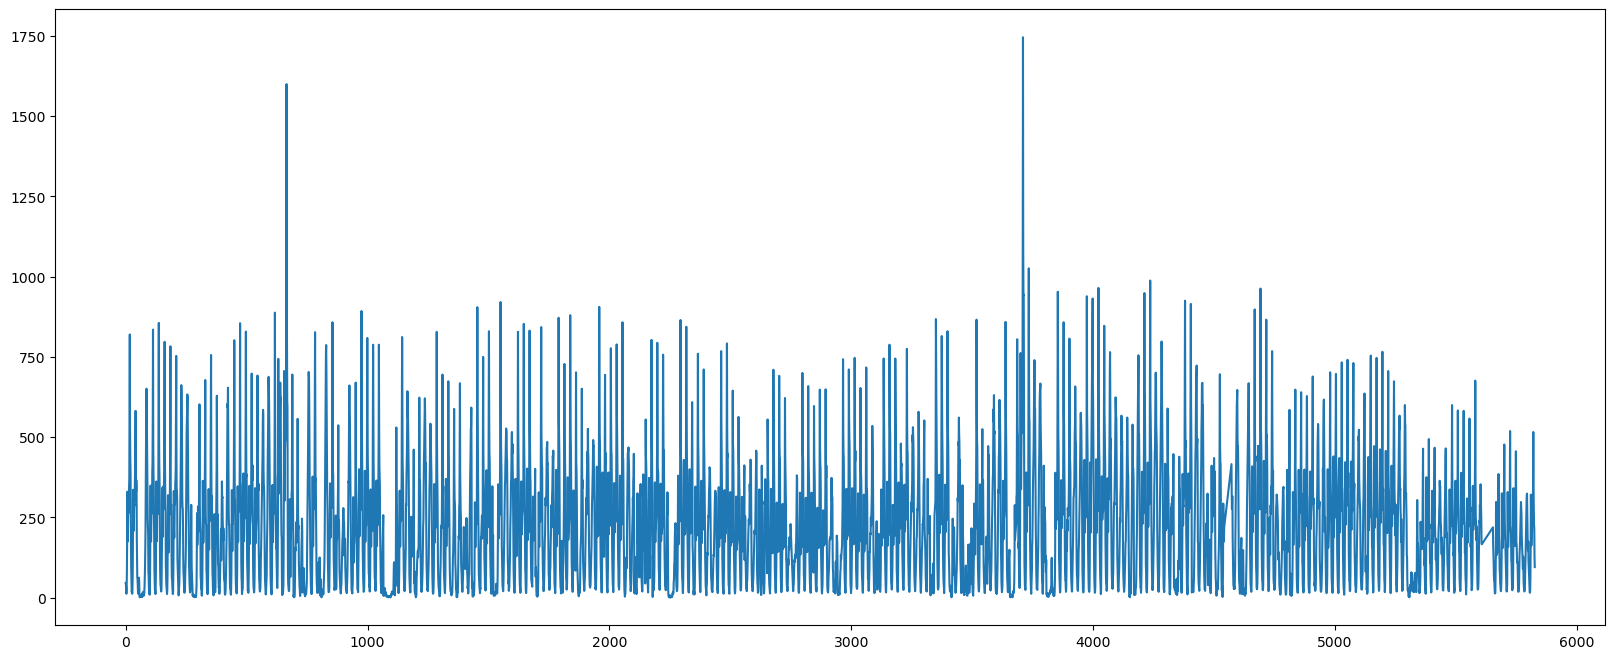

In [115]:
plt.figure(figsize=(20,8))
#변수의 분포를 확인해보세요.
plt.plot(df['count'])
# 화면에 보여주기
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [9]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [120]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('hour', as_index=False)['count'].count()
nf

,hour,count
0,0,239
1,1,240
2,2,237
3,3,237
4,4,237
5,5,238
6,6,237
7,7,240
8,8,239
9,9,238


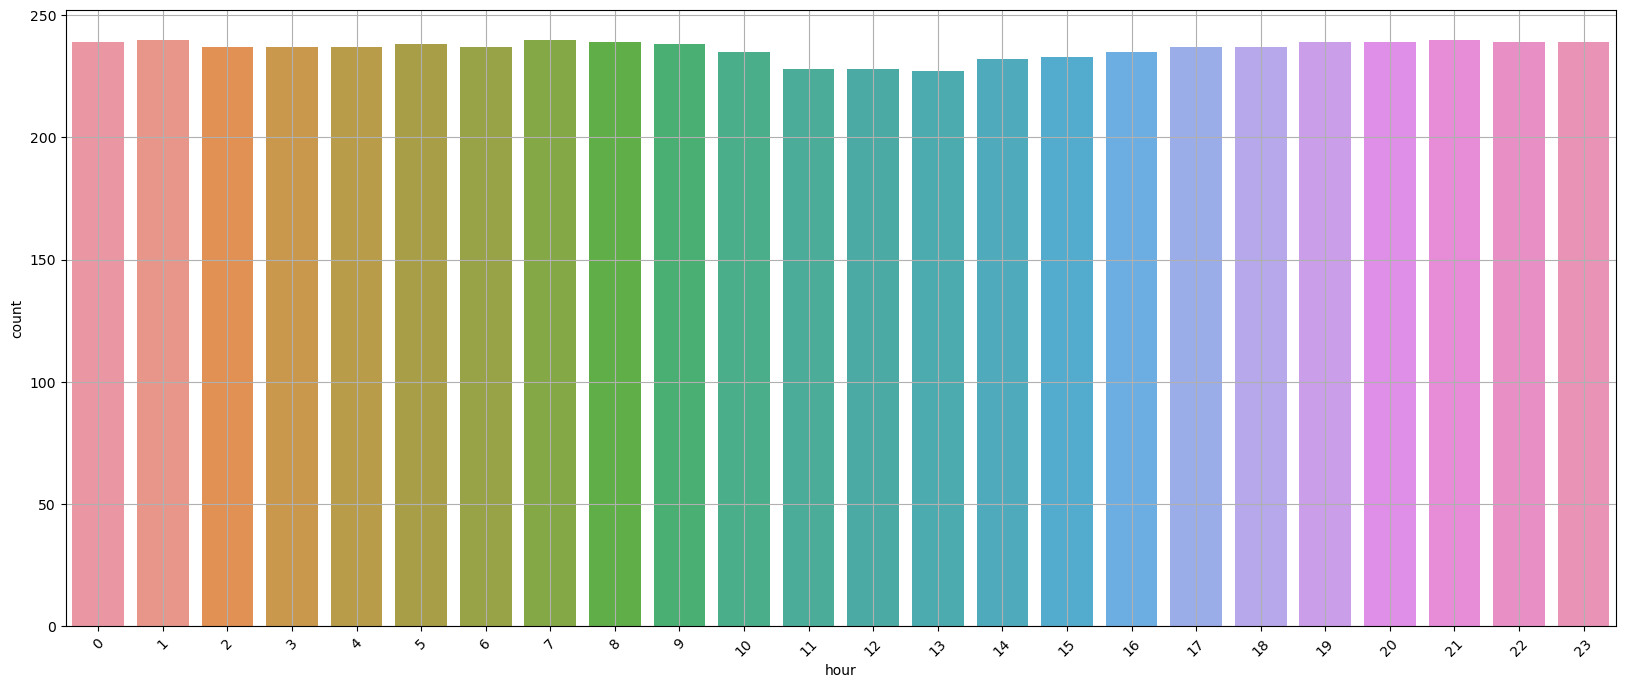

In [121]:
plt.figure(figsize=(20,8))
sns.barplot(x="hour", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

3. 온도 데이터와 따릉이 대여량간 분석

In [123]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('temperature', as_index=False)['count'].count()
nf

,temperature,count
0,-3.5,2
1,-3.2,1
2,-2.7,1
3,-2.5,1
4,-2.4,1
...,...,...
371,35.6,1
372,35.7,4
373,36.0,1
374,36.1,1


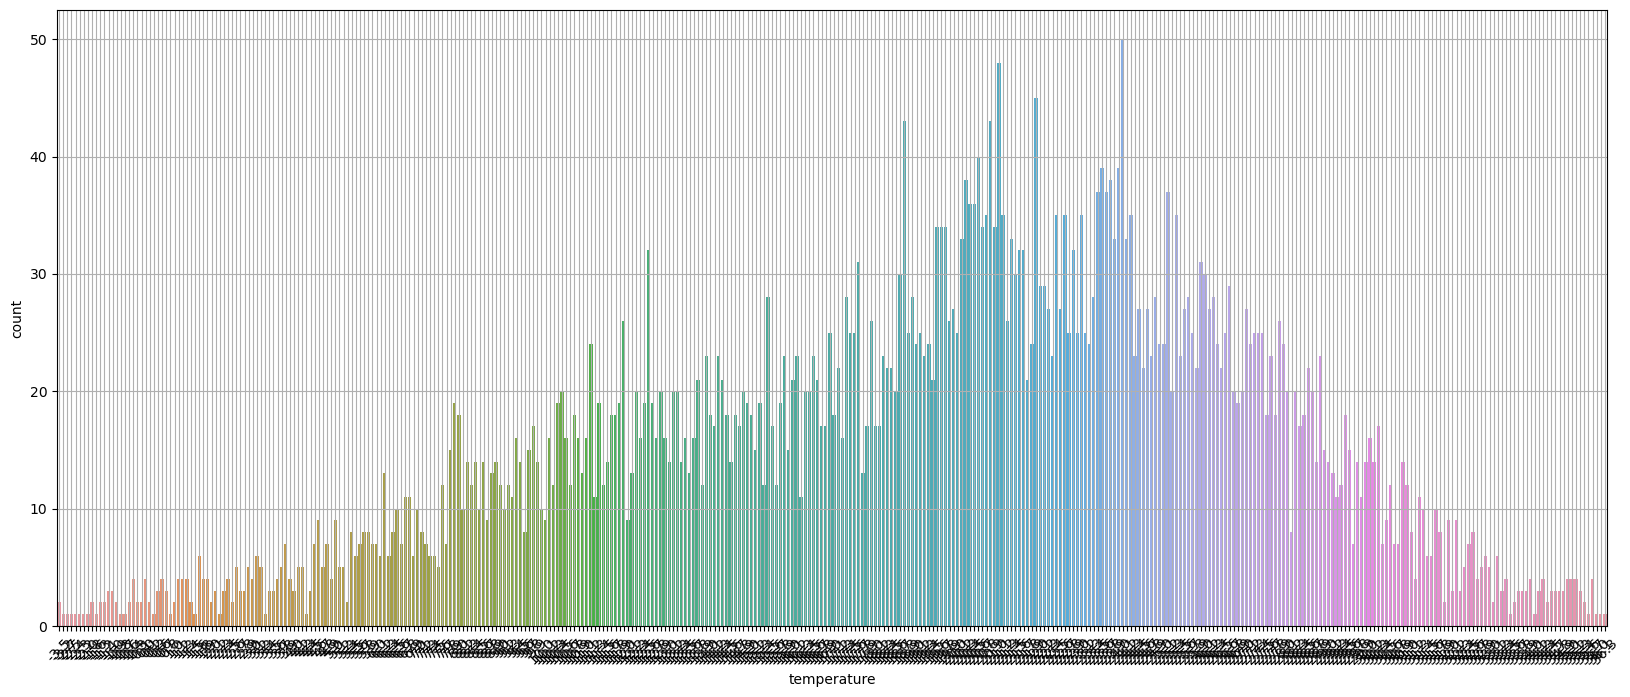

In [124]:
plt.figure(figsize=(20,8))
sns.barplot(x="temperature", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

4. 풍속 데이터와 따릉이 대여량간 분석

In [125]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('windspeed', as_index=False)['count'].count()
nf

,windspeed,count
0,0.0,8
1,0.1,13
2,0.2,24
3,0.3,38
4,0.4,47
...,...,...
65,6.7,2
66,6.8,1
67,6.9,1
68,8.1,1


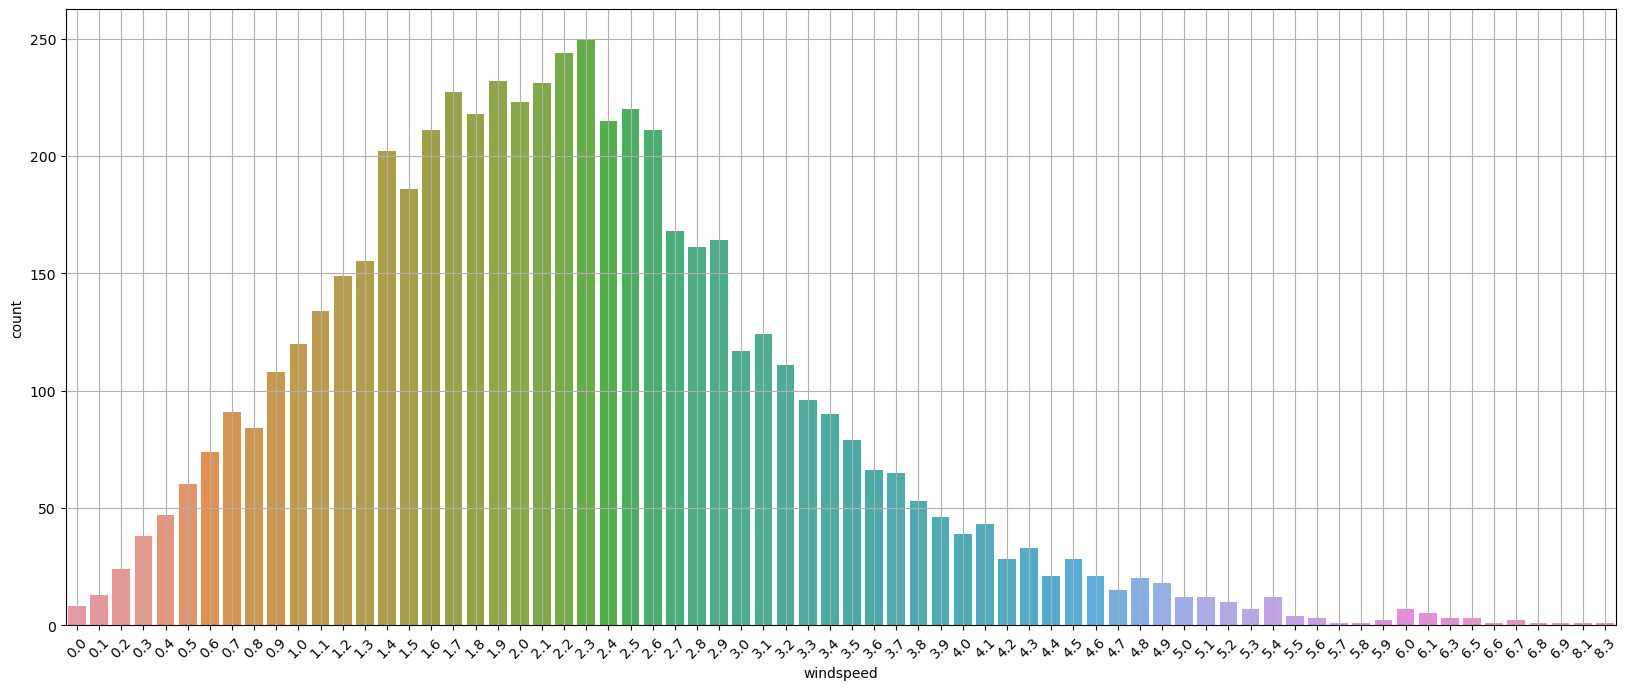

In [126]:
plt.figure(figsize=(20,8))
sns.barplot(x="windspeed", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

5. 습도 데이터와 따릉이 대여량간 분석

In [127]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('humidity', as_index=False)['count'].count()
nf

,humidity,count
0,19,1
1,20,3
2,21,2
3,22,2
4,23,5
...,...,...
77,96,56
78,97,50
79,98,50
80,99,29


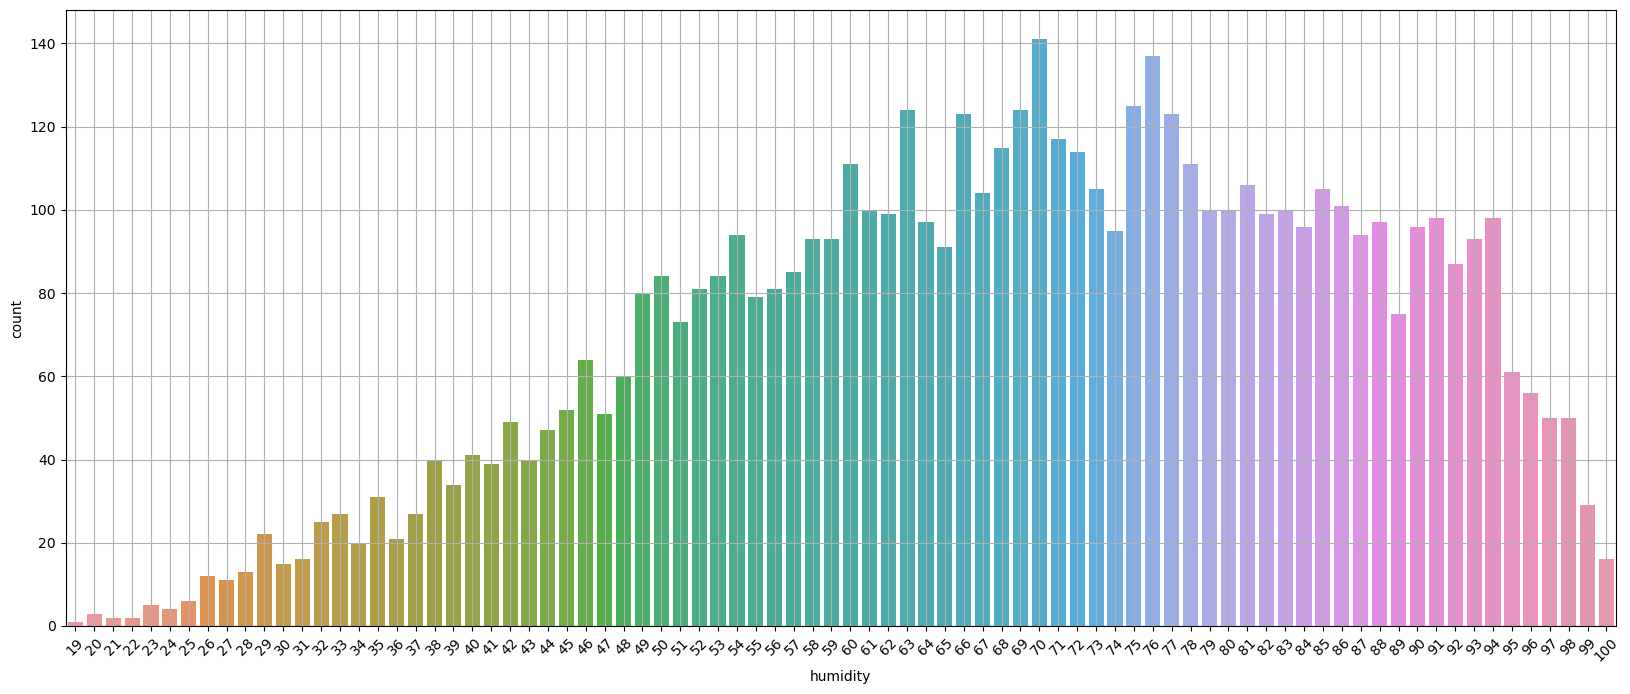

In [128]:
plt.figure(figsize=(20,8))
sns.barplot(x="humidity", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

6. 시정 데이터와 따릉이 대여량간 분석

In [129]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('visibility', as_index=False)['count'].count()
nf

,visibility,count
0,60,1
1,61,1
2,68,1
3,73,1
4,77,1
...,...,...
1008,1996,8
1009,1997,6
1010,1998,2
1011,1999,5


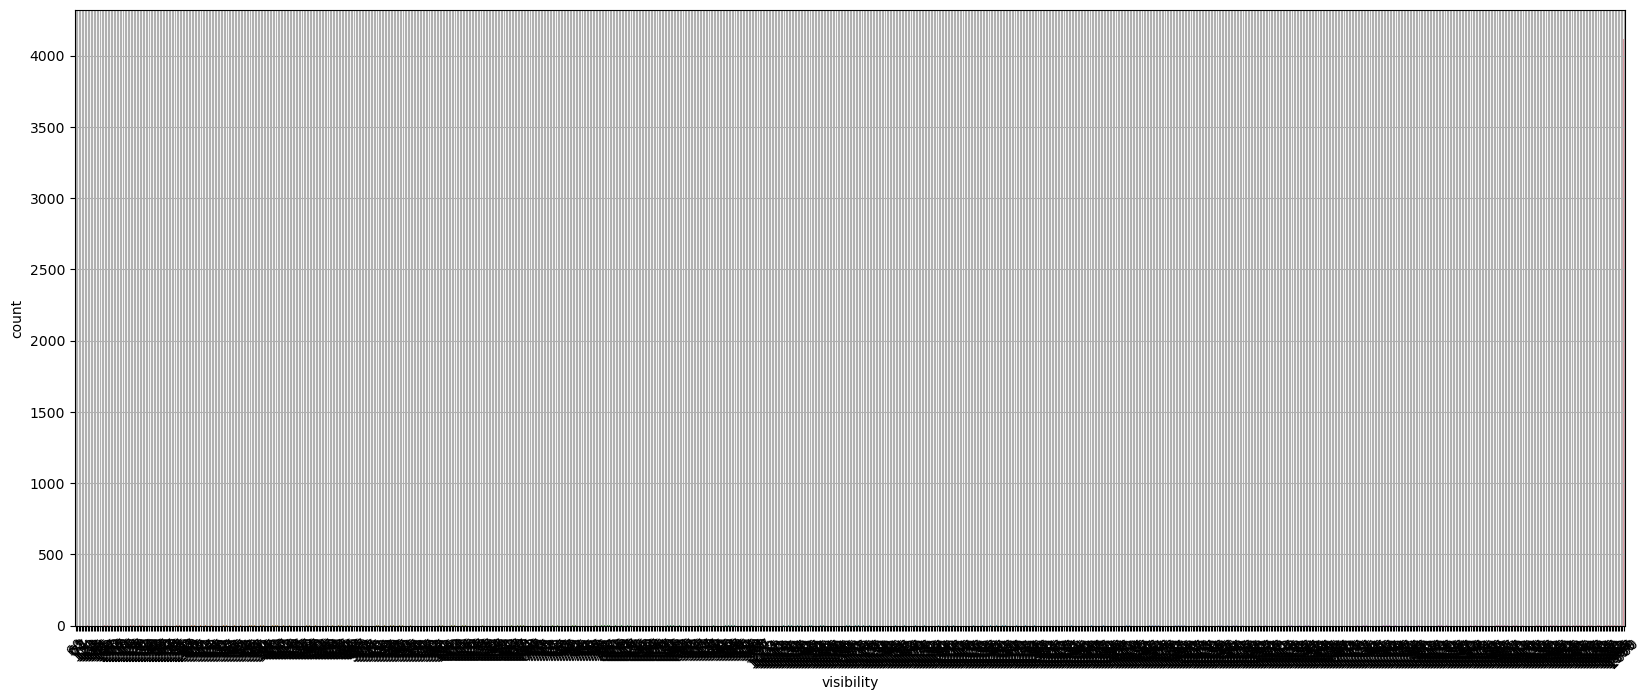

In [130]:
plt.figure(figsize=(20,8))
sns.barplot(x="visibility", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

7. 오존 데이터와 따릉이 대여량간 분석

In [131]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('ozone', as_index=False)['count'].count()
nf

,ozone,count
0,0.001,4
1,0.002,177
2,0.003,104
3,0.004,56
4,0.005,47
...,...,...
104,0.111,1
105,0.115,1
106,0.116,1
107,0.118,1


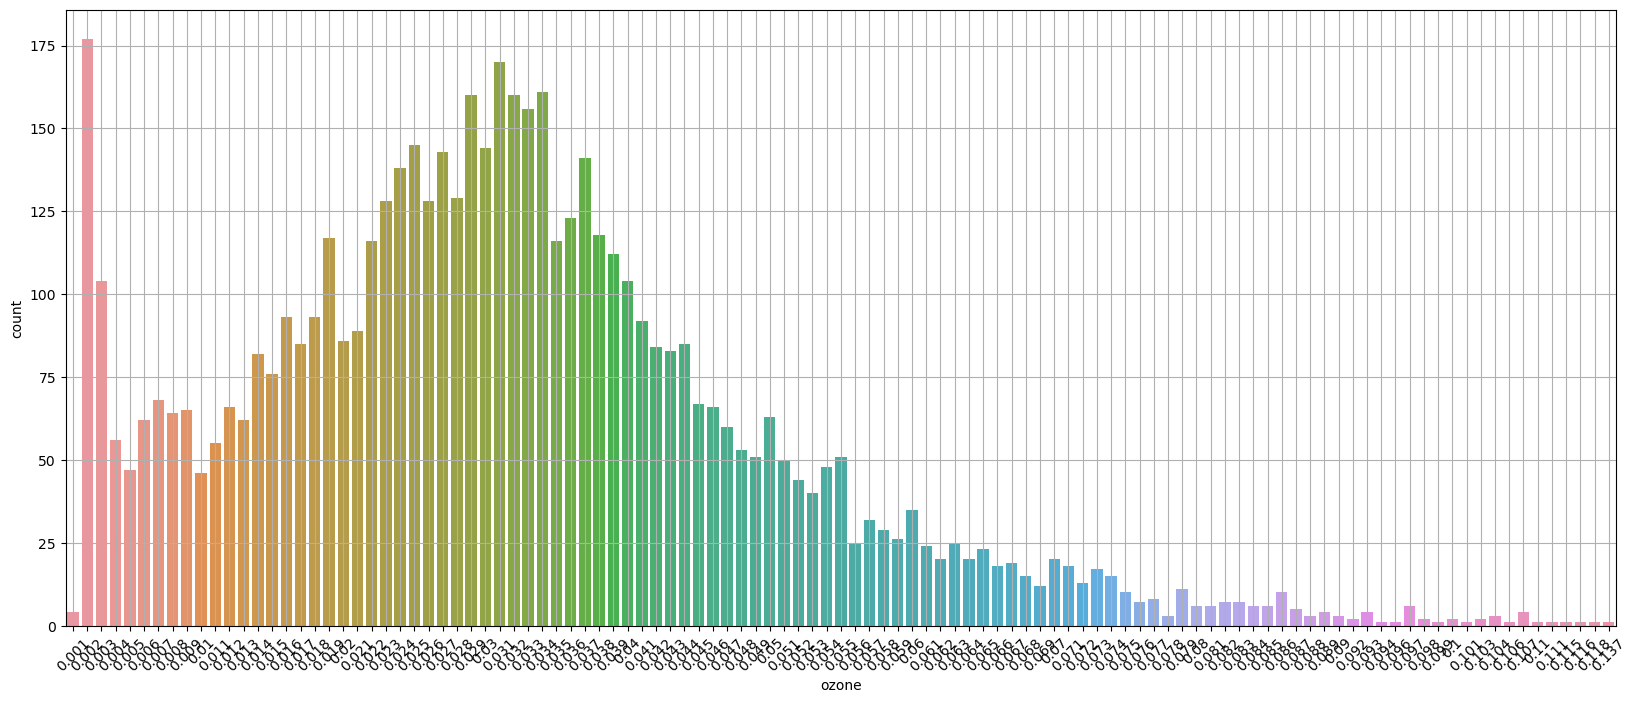

In [132]:
plt.figure(figsize=(20,8))
sns.barplot(x="ozone", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [134]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('PM2.5', as_index=False)['count'].count()
nf

,PM2.5,count
0,1.0,188
1,2.0,160
2,3.0,211
3,4.0,244
4,5.0,264
...,...,...
97,117.0,1
98,120.0,1
99,121.0,1
100,123.0,1


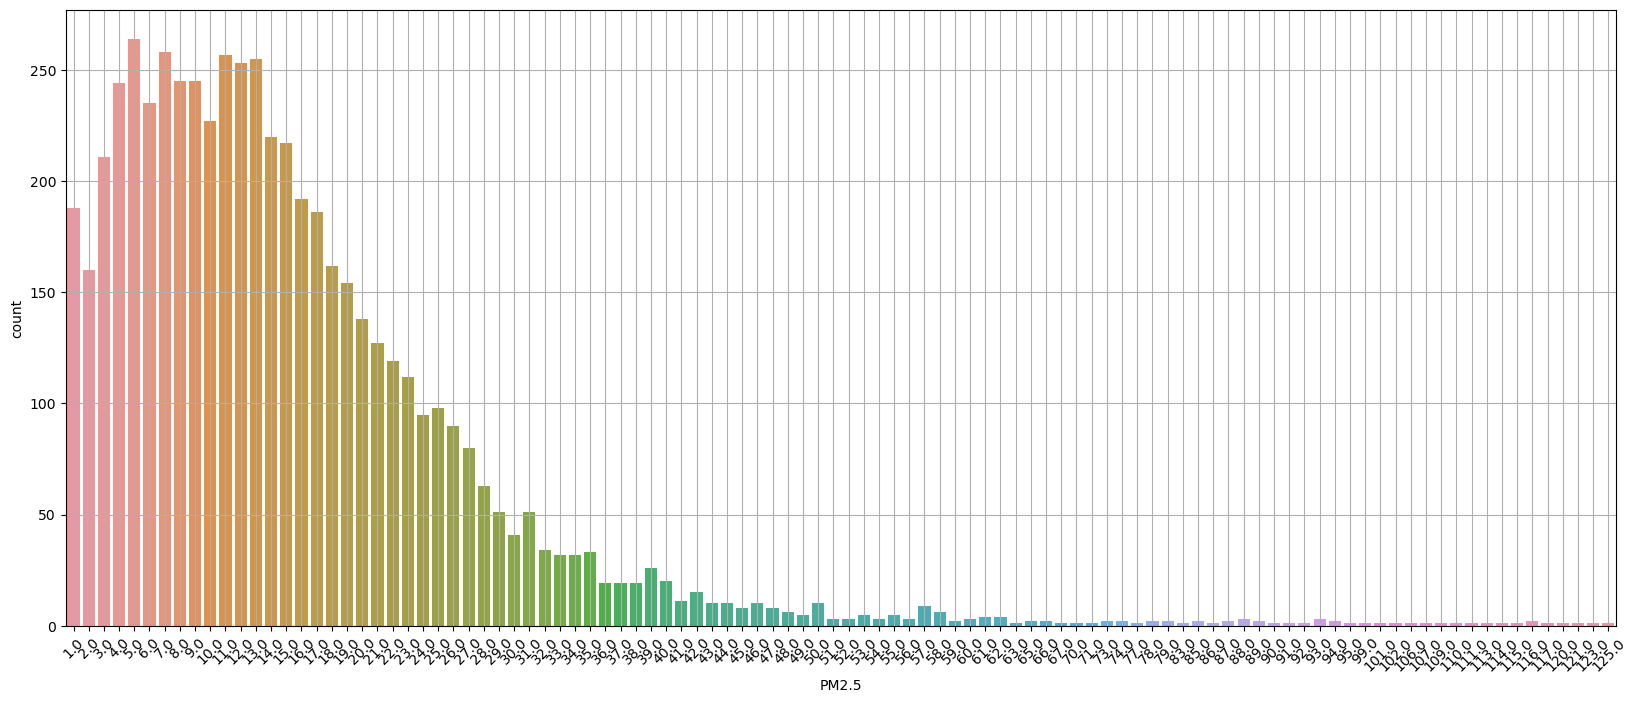

In [135]:
plt.figure(figsize=(20,8))
sns.barplot(x="PM2.5", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [136]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
nf = df.groupby('PM10', as_index=False)['count'].count()
nf

,PM10,count
0,3.0,35
1,4.0,30
2,5.0,47
3,6.0,65
4,7.0,67
...,...,...
175,706.0,1
176,726.0,1
177,799.0,1
178,817.0,1


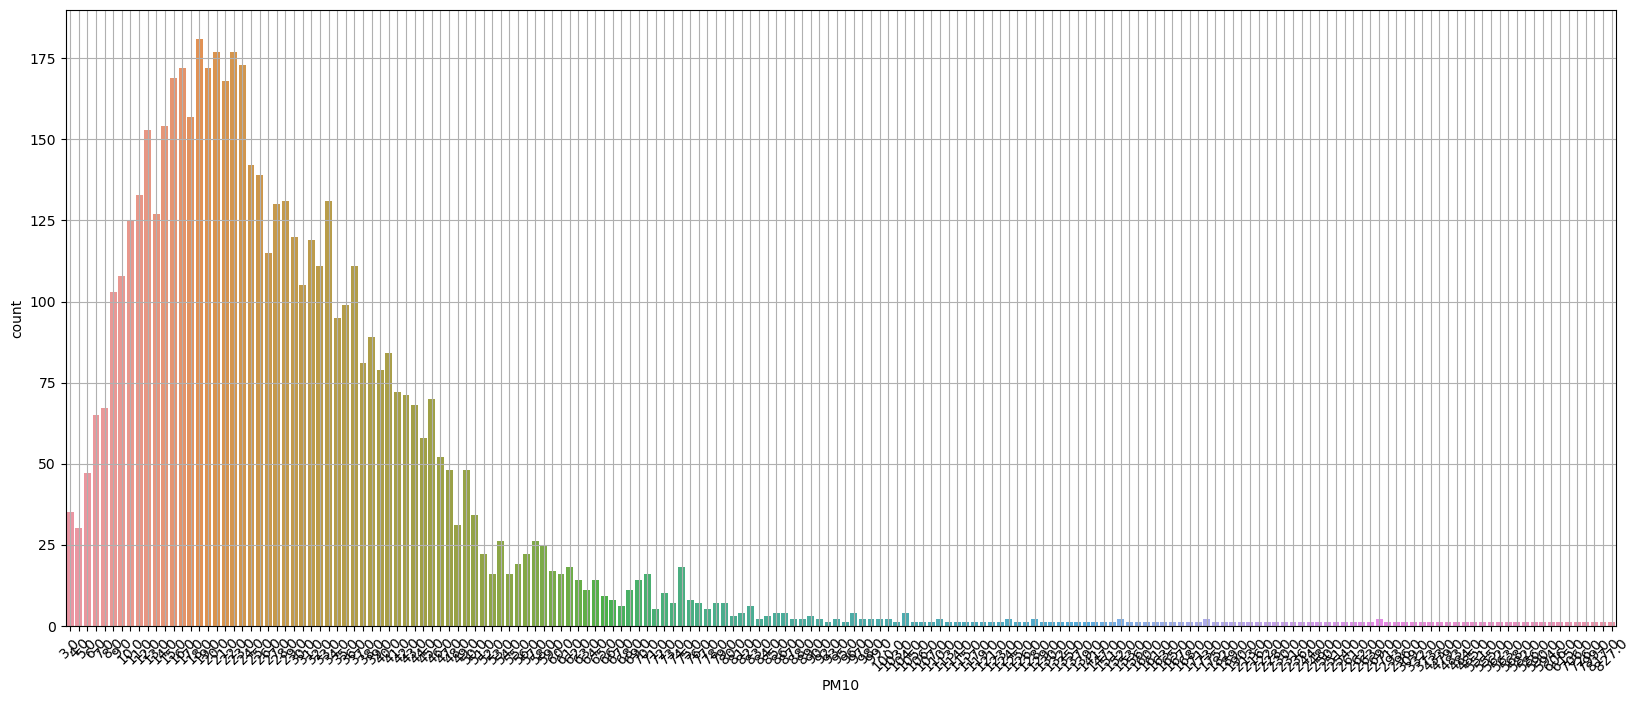

In [137]:
plt.figure(figsize=(20,8))
sns.barplot(x="PM10", y="count", data=nf)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출

시간을 오전 오후로 나누어서 그에 따른 따릉이 이용량을 그래프를 도출해보자.

In [238]:
df['ap'] =  df['hour'].map({
    0: '심야',
    1: '심야',
    2: '심야',
    3: '심야',
    4: '심야',
    5: '심야',
    6: '오전',
    7: '오전',
    8: '오전',
    9: '오전',
    10: '오전',
    11: '오전',
    12: '오후',
    13: '오후',
    14: '오후',
    15: '오후',
    16: '오후',
    17: '오후',
    18: '저녁',
    19: '저녁',
    20: '저녁',
    21: '저녁',
    22: '저녁',
    23: '저녁'
})
df['ap'] = df['ap'].astype('object')

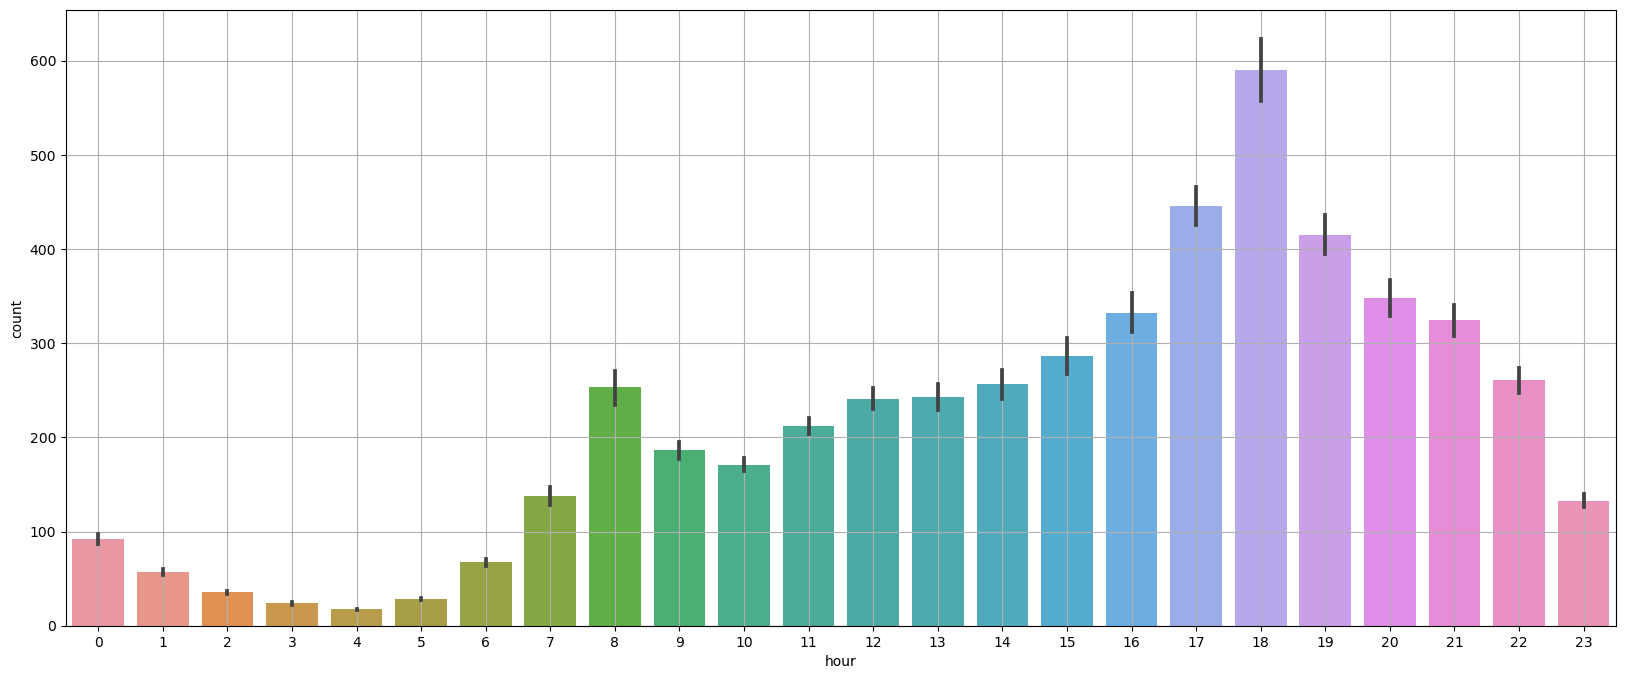

In [239]:
plt.figure(figsize=(20,8))
sns.barplot(x="hour", y="count", data=df)
# plt.xticks(rotation=45)
plt.grid()
plt.show()

In [244]:
spst.pearsonr(df['hour'], df['count'])

PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-

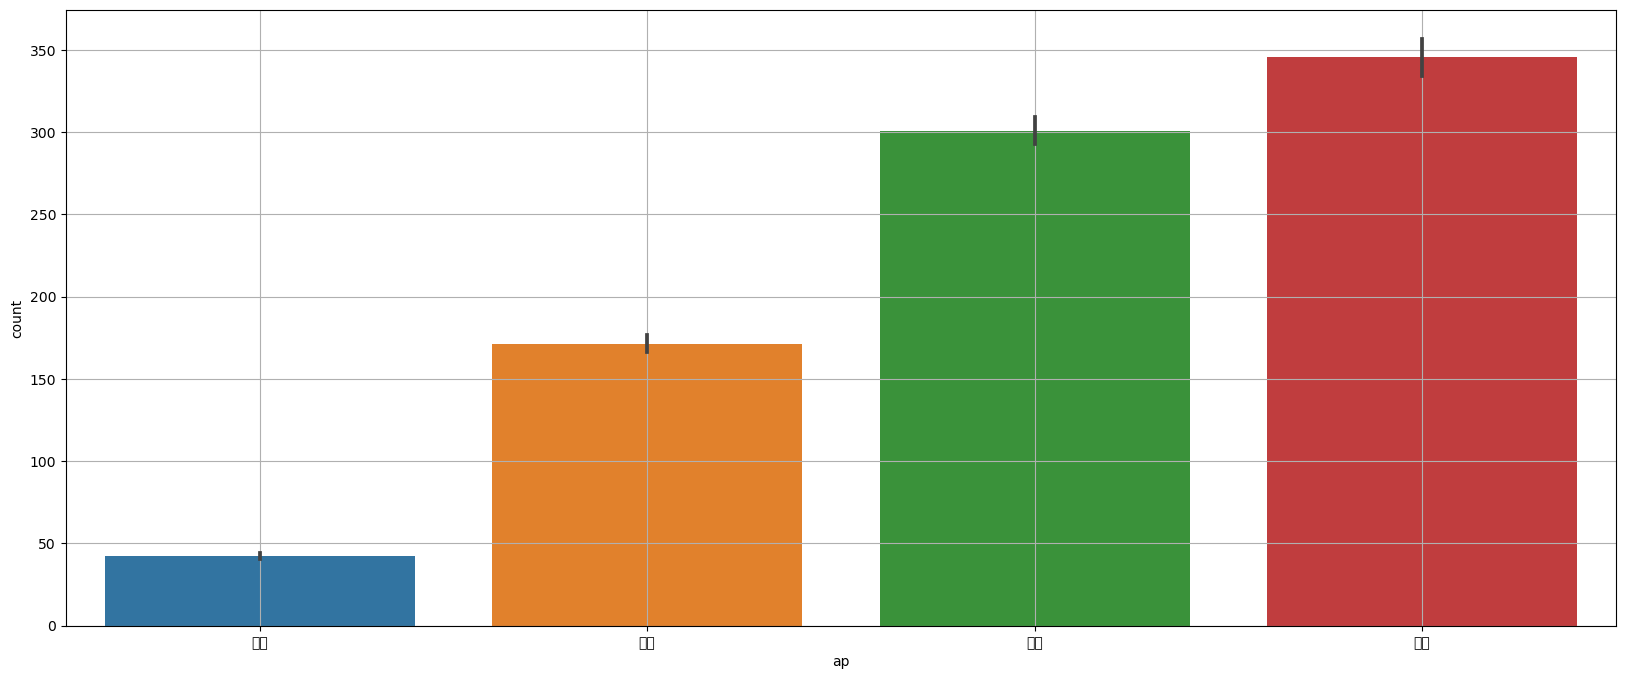

In [243]:
plt.figure(figsize=(20,8))
sns.barplot(x="ap", y="count", data=df)
# plt.xticks(rotation=45)
plt.grid()
plt.show()

월별 계절별 따릉이 이용량을 도출해보자.

In [139]:
df
# df['hour']

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,04
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,04
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,04
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,04
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,04
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,11
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,11
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,11
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,11


In [143]:
# df = df.dropna()
# new = df.pivot('hour', 'month', 'count')

In [205]:
df['month'].value_counts()

7     744
8     744
10    744
5     743
6     720
9     718
4     717
11    697
Name: month, dtype: int64

In [226]:
df['season'] = df['month'].map({
    1: '겨울',
    2: '겨울',
    3: '봄',
    4: '봄',
    5: '봄',
    6: '여름',
    7: '여름',
    8: '여름',
    9: '가을',
    10: '가을',
    11: '가을',
    12: '겨울'})
df['season'] = df['season'].astype('object')

In [230]:
df['season'].dtype

dtype('O')

In [231]:
df['season'].info

<bound method Series.info of 0        봄
1        봄
2        봄
3        봄
4        봄
        ..
5822    가을
5823    가을
5824    가을
5825    가을
5826    가을
Name: season, Length: 5827, dtype: object>

In [227]:
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,season
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4,봄
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4,봄
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4,봄
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4,봄
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,11,가을
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,11,가을
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,11,가을
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,11,가을


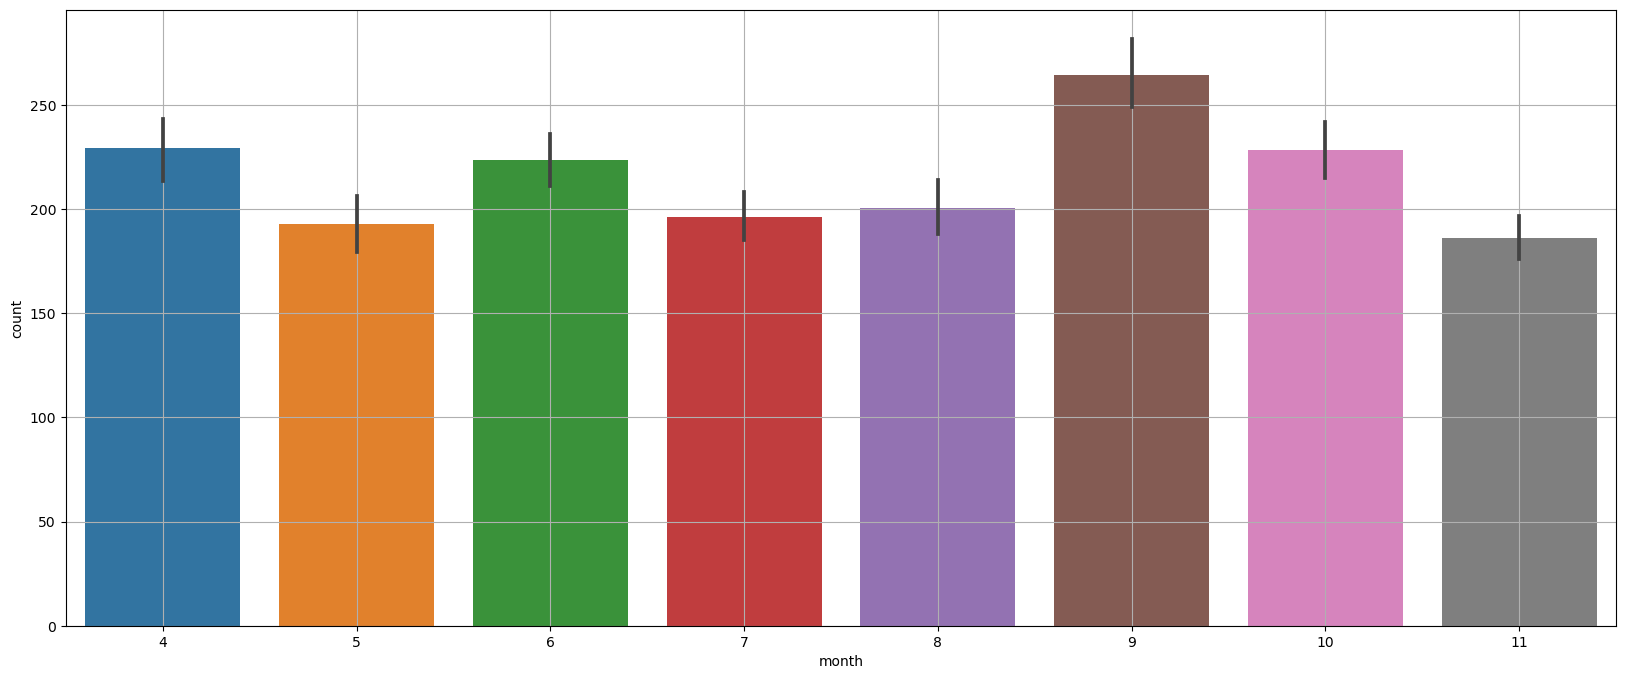

In [241]:
plt.figure(figsize=(20,8))
sns.barplot(x="month", y="count", data=df)
# plt.xticks(rotation=45)
plt.grid()
plt.show()

In [249]:
spst.pearsonr(df['month'], df['count'])

PearsonRResult(statistic=0.002183316318752903, pvalue=0.8676632069980207)

In [251]:
df['season'].sort_value()

AttributeError: 'Series' object has no attribute 'sort_value'

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


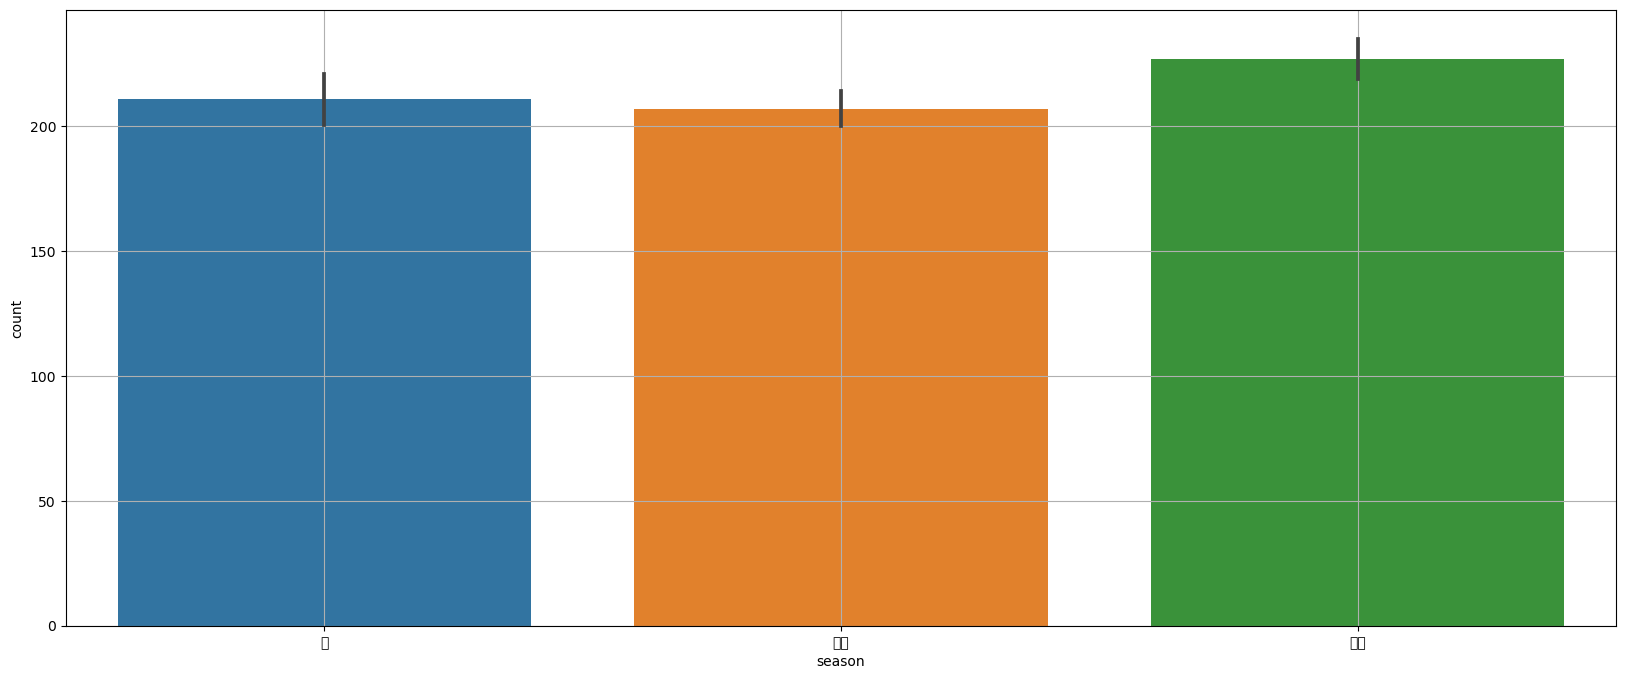

In [242]:
plt.figure(figsize=(20,8))
sns.barplot(x="season", y="count", data=df)
# plt.xticks(rotation=45)
plt.grid()
plt.show()

In [233]:
# spst.pearsonr(df['season'], df['count'])